<a href="https://colab.research.google.com/github/nschantz21/studious-succotash/blob/develop/notebooks/1_0_ns_initial_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initial Data Exploration of Orderbook Data
Jupyter notebook for preliminary exploratory data analysis (EDA) on one of the orderbook datasets.  
The nature of the data I see here will help me decide on which features I will use in the modeling step of the analysis.  

I am attempting to limit my knowledge of the data, in an abundance of precaution of overfitting the model to this limited dataset.

I will go through some simple descriptive statistics on the data, and the relationships between features. I will save feature engineering for another notebook based on what I observe here.

This will also help me in developing a causal model to be tested in a later notebook.

In [24]:
# imports
import pandas as pd
import random
import matplotlib.pyplot as plt

In [2]:
# constants
# you could change these and re-run the entire 
input_data_fp = "20190612.csv"
p = 0.1  # percent of lines in file to sample

In [3]:
random.seed(42)

I am only going to use a sample for the exploratory analysis. I think 1% of the data in the selected file is enough for some simple statistical analysis.

In [4]:
# if you want to know how many lines are in the file
# assumes running on linux
lines = !wc -l 20190612.csv
lines = int(lines[0].split(" ")[0])
print(lines)

273809


In [56]:

# keep the header, then take only 1% of lines
# if random from [0,1] interval is greater than 0.01 the row will be skipped
df = pd.read_csv(
         input_data_fp,
         header=0, 
         skiprows=lambda i: i>0 and random.random() > p
)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27332 entries, 0 to 27331
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  27332 non-null  int64  
 1   price      27332 non-null  int64  
 2   side       27332 non-null  object 
 3   bp0        27332 non-null  int64  
 4   bp1        27332 non-null  int64  
 5   bp2        27331 non-null  float64
 6   bp3        27328 non-null  float64
 7   bp4        27327 non-null  float64
 8   bq0        27332 non-null  int64  
 9   bq1        27332 non-null  int64  
 10  bq2        27332 non-null  int64  
 11  bq3        27332 non-null  int64  
 12  bq4        27332 non-null  int64  
 13  ap0        27332 non-null  int64  
 14  ap1        27332 non-null  int64  
 15  ap2        27332 non-null  int64  
 16  ap3        27329 non-null  float64
 17  ap4        27328 non-null  float64
 18  aq0        27332 non-null  int64  
 19  aq1        27332 non-null  int64  
 20  aq2   

In [59]:
# descriptive stats on numerical data
df.describe()

,timestamp,price,bp0,bp1,bp2,bp3,bp4,bq0,bq1,bq2,bq3,bq4,ap0,ap1,ap2,ap3,ap4,aq0,aq1,aq2,aq3,aq4
count,2.733200e+04,27332.000000,27332.000000,27332.000000,27331.000000,27328.000000,27327.000000,27332.000000,27332.000000,27332.000000,27332.000000,27332.000000,27332.000000,27332.000000,27332.000000,27329.000000,27328.000000,27332.000000,27332.000000,27332.000000,27332.000000,27332.000000
mean,1.920201e+10,10001.843078,9996.837407,9991.835943,9986.832352,9981.821575,9976.817982,50.729292,98.422069,108.884348,116.192119,119.726474,10001.999122,10006.999305,10011.999305,10016.988547,10021.984960,50.281428,93.330784,99.330638,106.952400,109.575443
std,8.410571e+09,49.875162,37.973349,37.973492,37.969544,37.957693,37.953741,39.183806,43.902086,52.617949,59.738409,63.877964,37.988831,37.988737,37.988737,37.976942,37.973009,38.400152,36.991119,38.262842,44.920071,51.126103
min,1.200000e+01,9855.000000,9930.000000,9925.000000,9920.000000,9915.000000,9910.000000,1.000000,2.000000,0.000000,0.000000,0.000000,9935.000000,9940.000000,9945.000000,9950.000000,9955.000000,1.000000,1.000000,9.000000,0.000000,0.000000
25%,1.218618e+10,9970.000000,9965.000000,9960.000000,9955.000000,9950.000000,9945.000000,20.000000,65.000000,71.000000,71.000000,69.000000,9970.000000,9975.000000,9980.000000,9985.000000,9990.000000,20.000000,67.000000,71.000000,76.000000,76.000000
50%,1.852842e+10,9995.000000,9990.000000,9985.000000,9980.000000,9975.000000,9970.000000,43.000000,93.000000,100.000000,103.000000,105.000000,9995.000000,10000.000000,10005.000000,10010.000000,10015.000000,43.000000,88.000000,94.000000,99.000000,100.000000
75%,2.551686e+10,10030.000000,10015.000000,10010.000000,10005.000000,10000.000000,9995.000000,71.000000,127.000000,134.000000,145.000000,154.000000,10020.000000,10025.000000,10030.000000,10035.000000,10040.000000,71.000000,116.000000,122.000000,127.000000,133.000000
max,3.599904e+10,10180.000000,10095.000000,10090.000000,10085.000000,10080.000000,10075.000000,260.000000,287.000000,304.000000,312.000000,289.000000,10105.000000,10110.000000,10115.000000,10120.000000,10125.000000,263.000000,263.000000,283.000000,393.000000,412.000000


# Visualizations

First un grouped then grouped by side

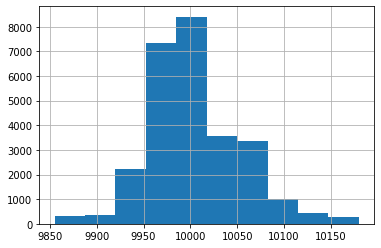

In [60]:
df["price"].hist()

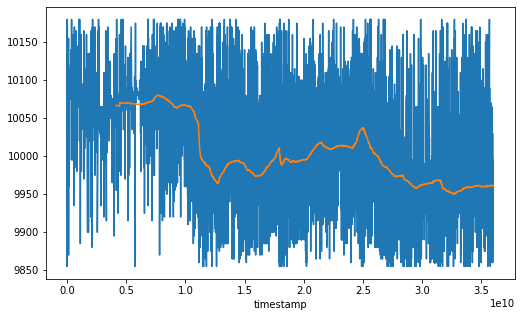

In [61]:
df.set_index("timestamp")["price"].plot(figsize=(5*1.68, 5))
df.set_index("timestamp")["price"].rolling(1000).mean().plot()

### Descriptive Statistics by Bid/Ask Side
Breaking down distribution visualizations by bid/ask side.

From the descriptive statistics show that the sampled asks have a larger distribution of prices. This is shown in the slightly larger standard deviation, differences in quartile values, and IQR.  

However, upon visual inspection of the distributions, they appear to be fairly close in dispersion, albeit with different means.  

Also noteworthy, both the bids and asks show the same trend over time.

In [64]:
bids = df.where(df["side"] == "b").dropna()
asks = df.where(df["side"] == "a").dropna()

In [65]:
bids["price"].describe()

count    13581.000000
mean      9984.910537
std         44.722279
min       9855.000000
25%       9955.000000
50%       9980.000000
75%      10010.000000
max      10100.000000
Name: price, dtype: float64

In [66]:
asks["price"].describe()

count    13746.000000
mean     10018.535938
std         49.036004
min       9935.000000
25%       9980.000000
50%      10005.000000
75%      10050.000000
max      10180.000000
Name: price, dtype: float64

In [67]:
# difference between quartiles
asks["price"].describe().drop(["count", "mean", "std"]).diff()

min      NaN
25%     45.0
50%     25.0
75%     45.0
max    130.0
Name: price, dtype: float64

In [68]:
# difference between quartiles
bids["price"].describe().drop(["count", "mean", "std"]).diff()

min      NaN
25%    100.0
50%     25.0
75%     30.0
max     90.0
Name: price, dtype: float64

side
a    AxesSubplot(0.125,0.125;0.775x0.755)
b    AxesSubplot(0.125,0.125;0.775x0.755)
Name: price, dtype: object

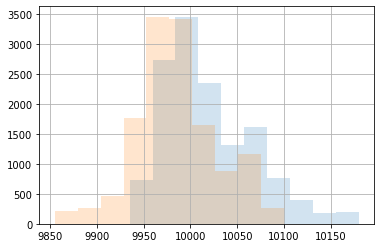

In [69]:
df[["price", "side"]].groupby("side")["price"].hist(alpha=.2)

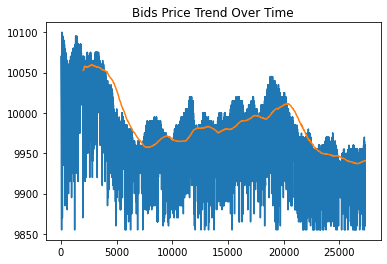

In [70]:
bids["price"].plot()
bids["price"].rolling(1000).mean().plot(title="Bids Price Trend Over Time")

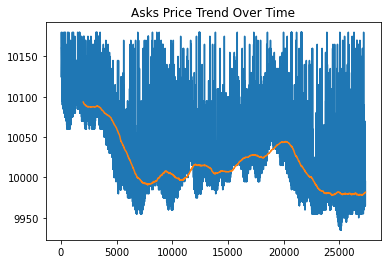

In [71]:
asks["price"].plot()
asks["price"].rolling(1000).mean().plot(title="Asks Price Trend Over Time")

# Top Bids and Asks
Next I want to explore the orderbook top bids and asks.  
I'll look at distributions of both the price and quantity.  
I am looking for patterns and anomolies to help inform my decision on which features to include in the modeling process.  

I am also creating these for the sake of completeness, and for reference if I need to check distributions later in the analysis

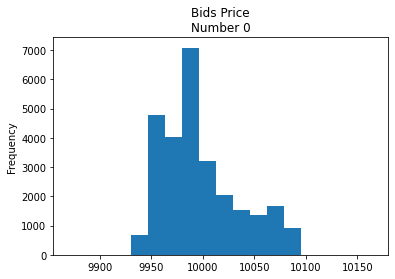

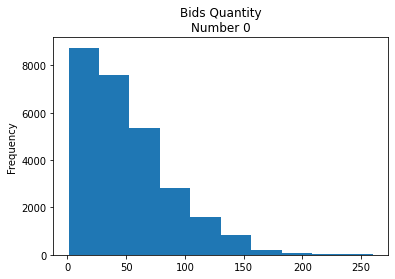

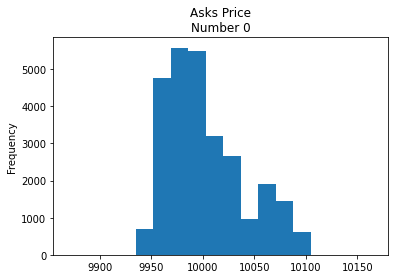

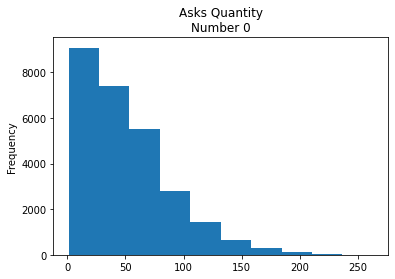

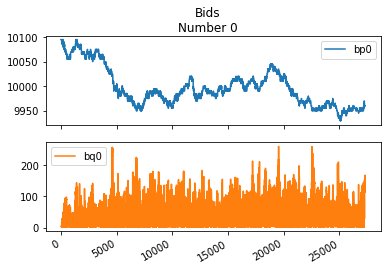

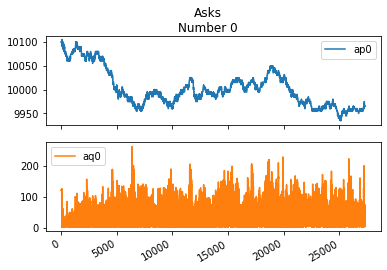

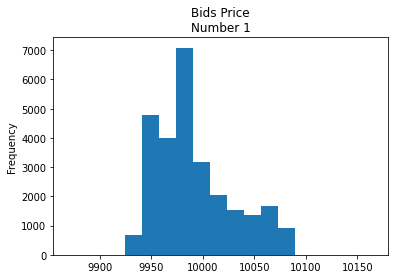

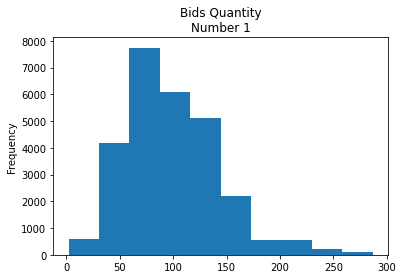

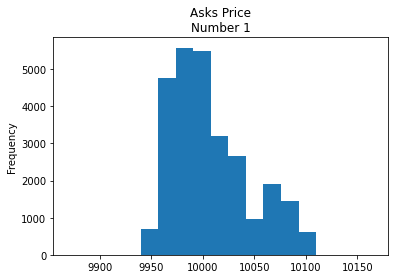

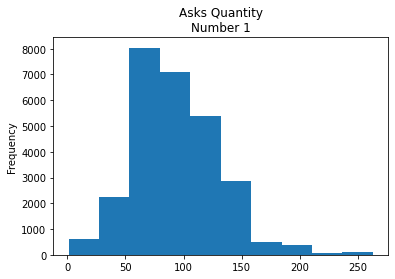

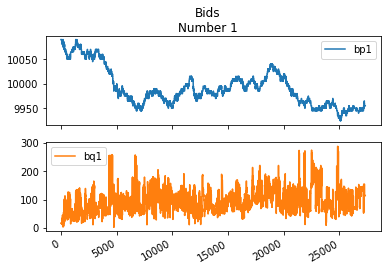

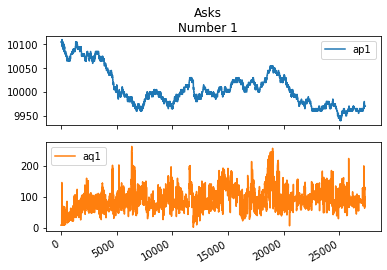

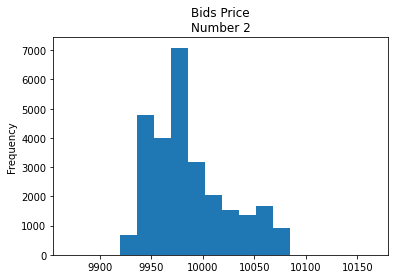

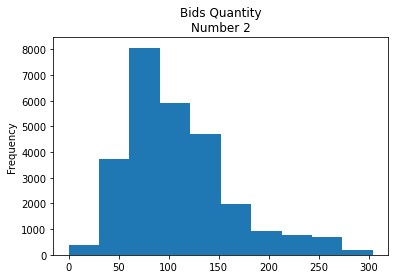

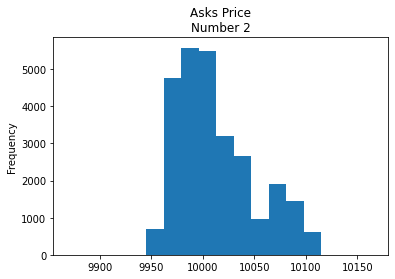

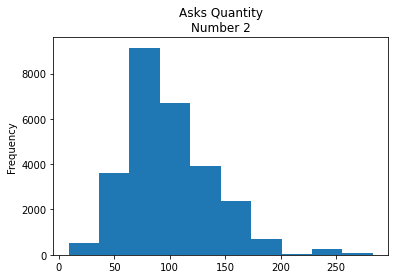

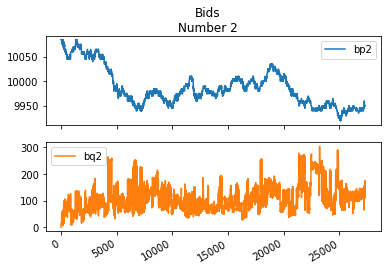

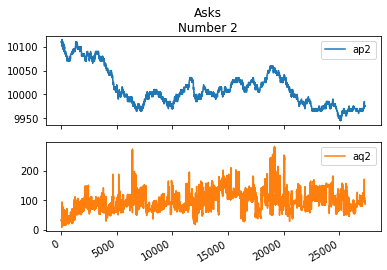

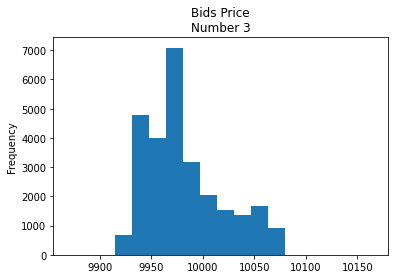

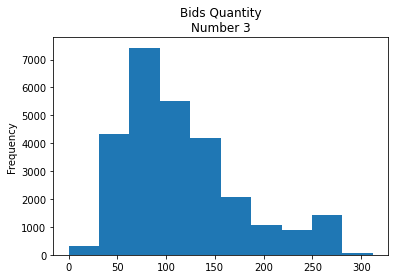

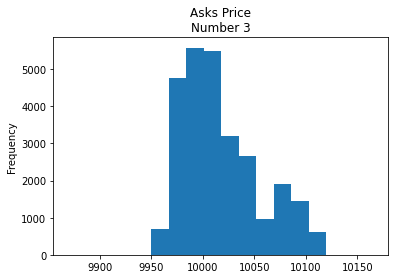

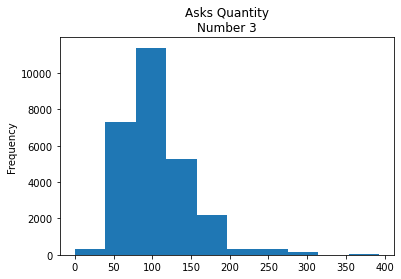

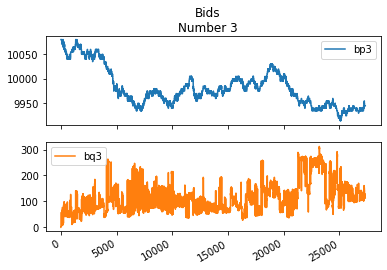

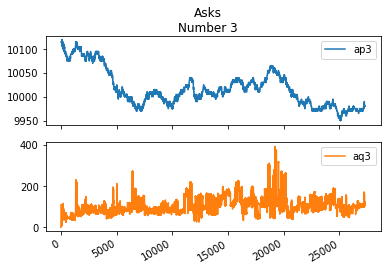

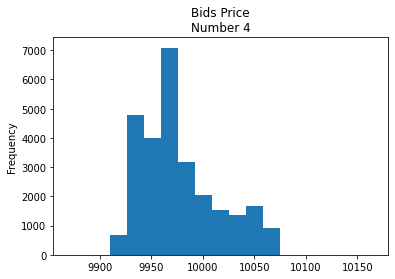

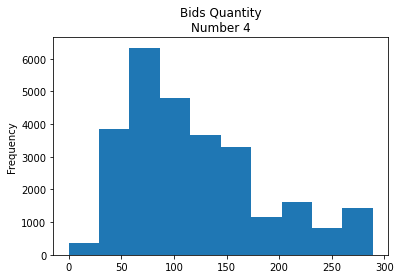

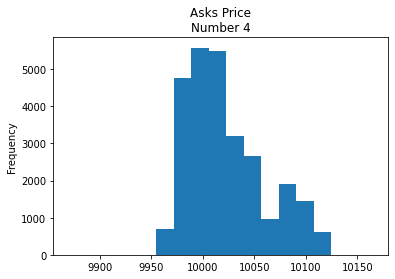

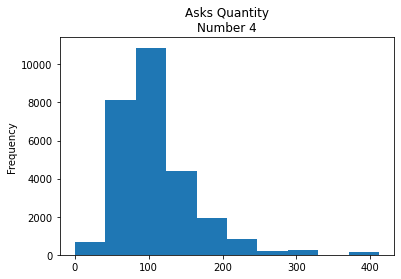

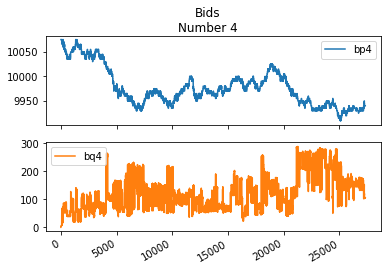

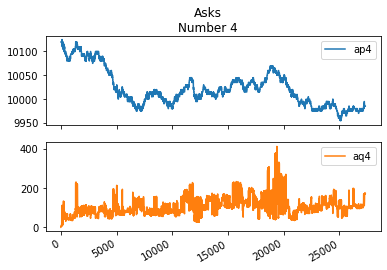

In [72]:
pmin = df["price"].min()
pmax = df["price"].max()

for x in range(5):
    # histograms
    df["bp{}".format(x)].plot(
        kind='hist',
        title="Bids Price\nNumber {}".format(x),
        xlim=(pmin, pmax))
    plt.show()
    plt.close()
    df["bq{}".format(x)].plot(kind='hist', title="Bids Quantity\nNumber {}".format(x))
    plt.show()
    plt.close()
    df["ap{}".format(x)].plot(
        kind='hist',
        title="Asks Price\nNumber {}".format(x),
        xlim=(pmin, pmax))
    plt.show()
    plt.close()
    df["aq{}".format(x)].plot(kind='hist', title="Asks Quantity\nNumber {}".format(x))
    plt.show()
    plt.close()


    # time series plots
    df[["bp{}".format(x), "bq{}".format(x)]].plot(subplots=True, title="Bids\nNumber {}".format(x))
    df[["ap{}".format(x), "aq{}".format(x)]].plot(subplots=True, title="Asks\nNumber {}".format(x))
    plt.show()
    plt.close()

# Relationships Between Features
I want to look at simple descriptive statistics on the relationships beteen the features.

In [73]:
# correlation of best bid/ask prices
df.filter(regex="[ba]p").corr()

,bp0,bp1,bp2,bp3,bp4,ap0,ap1,ap2,ap3,ap4
bp0,1.000000,0.999997,0.999997,0.999997,0.999997,0.999702,0.999702,0.999702,0.999702,0.999702
bp1,0.999997,1.000000,1.000000,1.000000,1.000000,0.999700,0.999700,0.999700,0.999699,0.999699
bp2,0.999997,1.000000,1.000000,1.000000,1.000000,0.999700,0.999700,0.999700,0.999699,0.999699
bp3,0.999997,1.000000,1.000000,1.000000,1.000000,0.999700,0.999699,0.999699,0.999699,0.999699
bp4,0.999997,1.000000,1.000000,1.000000,1.000000,0.999700,0.999699,0.999699,0.999699,0.999699
ap0,0.999702,0.999700,0.999700,0.999700,0.999700,1.000000,1.000000,1.000000,1.000000,1.000000
ap1,0.999702,0.999700,0.999700,0.999699,0.999699,1.000000,1.000000,1.000000,1.000000,1.000000
ap2,0.999702,0.999700,0.999700,0.999699,0.999699,1.000000,1.000000,1.000000,1.000000,1.000000
ap3,0.999702,0.999699,0.999699,0.999699,0.999699,1.000000,1.000000,1.000000,1.000000,1.000000
ap4,0.999702,0.999699,0.999699,0.999699,0.999699,1.000000,1.000000,1.000000,1.000000,1.000000


# Autocorrelation Analysis
The concept of momentum in price movements is to be expected, but the length of lag in that momentum or its reversal, and its magnitude can be uncovered to some extent through autocorrelation plots.  

These Autocorrelation plots will help me determine if I should include some lagged values as predictive features in the causal model.

Unsurprisingly, the majority of the autocorrelation comes from the first 1000 lagged observations. Although the Bids apprear to show higher autocorrelation than the Asks.

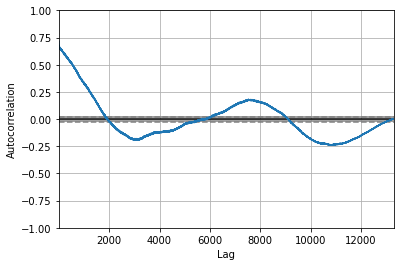

In [88]:
pd.plotting.autocorrelation_plot(bids.groupby("timestamp")["price"].mean())

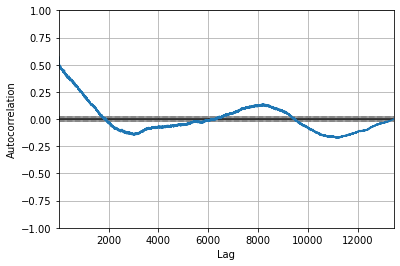

In [89]:
pd.plotting.autocorrelation_plot(asks.groupby("timestamp")["price"].mean())

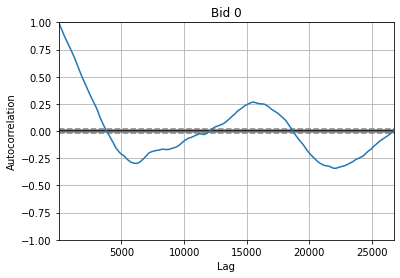

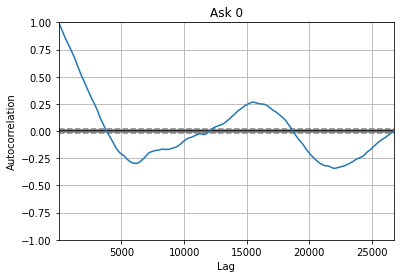

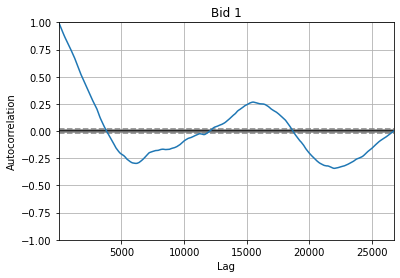

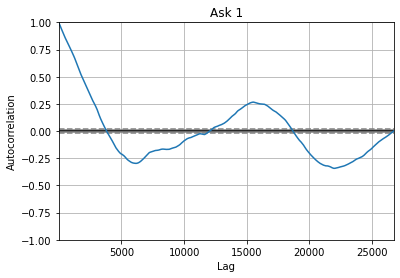

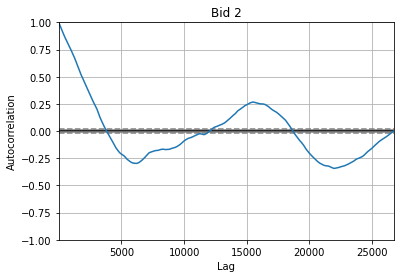

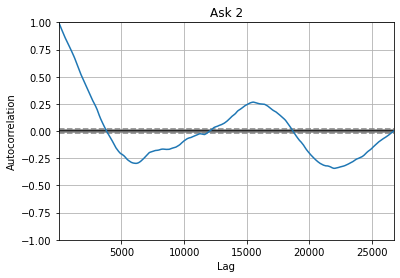

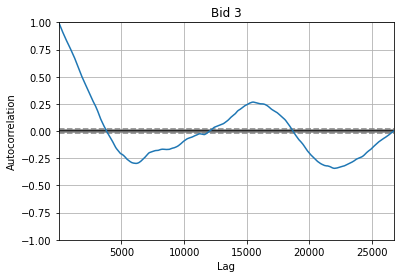

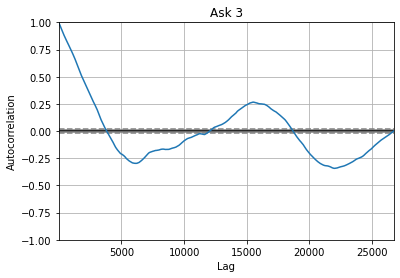

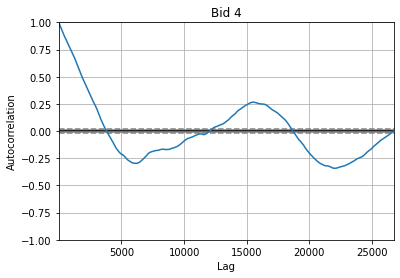

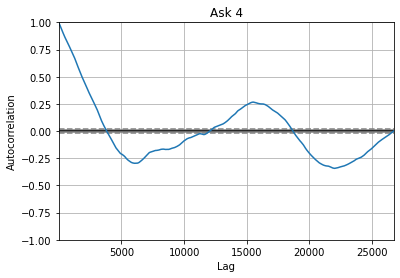

In [91]:
timestamp_groups = df.groupby("timestamp")
for x in range(5):
    pd.plotting.autocorrelation_plot(timestamp_groups["bp{}".format(x)].mean().sort_index().dropna())
    plt.title("Bid {}".format(x))
    plt.show()
    plt.close()
    pd.plotting.autocorrelation_plot(timestamp_groups["ap{}".format(x)].mean().sort_index().dropna())
    plt.title("Ask {}".format(x))
    plt.show()
    plt.close()